In [1]:
## récup données Tidy

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import re
from io import StringIO
import os
from os.path import basename, splitext
#from pathlib import Path
import seaborn as sns


In [2]:
#fonction de récupération des matrices des fichiers .md
def get_sections(s):
    for sec in s.split('## '):
        yield sec if sec.startswith('## ') else '## '+sec

In [3]:
#fonction de production des donnnées sous forme de tableau propre
def prod_DF(texteT,titre,subfile):
    dfGlobalDataLoc = pd.DataFrame(columns=['accuracy', 'precision', 'recall','support','typology','label'])
    for i,sec in enumerate(get_sections(texteT)):
        if i == 0:
            pass
        else:
            print(i,sec)
            sec2 = re.sub('##.*', '', sec)
            currentVal = re.search('##\s*(\w*)\n', sec).group(1)
            df = pd.read_csv(StringIO(sec2.replace(' ', '')), sep='|',index_col=1).dropna(axis=1,how='all').iloc[1:]
            df.insert(4,"type",subfile, True)
            #titreOk =  titre.partition("TidyLex")[0]
            #variation tidyLex
            titreOk =  titre.partition("TidyLex")[0]
            df.insert(5,"typology",titreOk,True)
            df.insert(6,"label",currentVal,True)
            dfGlobalDataLoc = dfGlobalDataLoc.append(df)
    print(dfGlobalDataLoc)        
    return dfGlobalDataLoc

In [4]:
dfGlobalData = pd.DataFrame(columns=['accuracy', 'precision', 'recall','support','type','typology','label'])

In [5]:
basepath = 'tableursParVal/'
for subFile in os.listdir(basepath):
    if os.path.isdir(os.path.join(basepath, subFile)):
        ## attention aux noms : variations TidyLex
        dir_path = os.path.join(basepath, subFile)+'/tidyLex/'
        print(dir_path)
        for entry in os.listdir(dir_path):
            if entry.endswith('ConfusionTidyLex.md'):
                fullPath =dir_path+entry
                with open(fullPath, 'r') as f:
                    texteT = f.read()
                    print(f)
                    t = splitext(basename(fullPath))[0]
                    titre = t.partition(".tsv")[0]
                    dfGlobalDataLoc = prod_DF(texteT,titre,subFile)
                    dfGlobalData = dfGlobalData.append(dfGlobalDataLoc)

tableursParVal/deaf/tidyLex/
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/IpHTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8843   | 0.7257    | 0.7257 | 268     |
| known-tokens     | 0.8843   | 0.7257    | 0.7257 | 268     |
| ambiguous-tokens | 0.7568   | 0.5536    | 0.5595 | 37      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 3       |


                 accuracy precision  recall support typology  label  type
all                0.8843    0.7257  0.7257     268      IpH  lemma  deaf
known-tokens       0.8843    0.7257  0.7257     268      IpH  lemma  deaf
ambiguous-tokens   0.7568    0.5536  0.5595      37      IpH  lemma  deaf
unknown-targets       0.0       0.0     0.0       3      IpH  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/EvEnfBTidyLex.tsv-LemmaConfusionTid

                 accuracy precision  recall support   typology  label  type
all                0.8375    0.6837  0.6905      80  BenTroieC  lemma  deaf
known-tokens       0.8375    0.6837  0.6905      80  BenTroieC  lemma  deaf
ambiguous-tokens   0.6471    0.3594   0.375      17  BenTroieC  lemma  deaf
unknown-targets       1.0       1.0     1.0       1  BenTroieC  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/MaccabESTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7949   | 0.4921    | 0.4426 | 39      |
| known-tokens     | 0.7949   | 0.4921    | 0.4426 | 39      |
| ambiguous-tokens | 0.8      | 0.75      | 0.6667 | 5       |


                 accuracy precision  recall support  typology label  type
all                0.7949    0.4921  0.4426      39  MaccabES   POS  deaf
known-tokens       0.

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/MaccabESTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8718   | 0.7429    | 0.7286 | 39      |
| known-tokens     | 0.8718   | 0.7429    | 0.7286 | 39      |
| ambiguous-tokens | 0.5      | 0.3333    | 0.3333 | 2       |


                 accuracy precision  recall support  typology  label  type
all                0.8718    0.7429  0.7286      39  MaccabES  lemma  deaf
known-tokens       0.8718    0.7429  0.7286      39  MaccabES  lemma  deaf
ambiguous-tokens      0.5    0.3333  0.3333       2  MaccabES  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/ThebesR_CTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|

                 accuracy precision  recall support  typology  label  type
all                0.9091    0.7931  0.7931      33  RenNouvR  lemma  deaf
known-tokens       0.9091    0.7931  0.7931      33  RenNouvR  lemma  deaf
ambiguous-tokens   0.8333       0.6     0.6       6  RenNouvR  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/RobClariLTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7619   | 0.3849    | 0.4288 | 189     |
| known-tokens     | 0.7619   | 0.3849    | 0.4288 | 189     |
| ambiguous-tokens | 0.5862   | 0.5012    | 0.458  | 29      |


                 accuracy precision  recall support   typology label  type
all                0.7619    0.3849  0.4288     189  RobClariL   POS  deaf
known-tokens       0.7619    0.3849  0.4288     189  RobClariL   POS  deaf
ambiguous-tokens   0.58

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/ContPerc_4_TW*TidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9062   | 0.7931    | 0.7931 | 32      |
| known-tokens     | 0.9062   | 0.7931    | 0.7931 | 32      |
| ambiguous-tokens | 1.0      | 1.0       | 1.0    | 1       |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 2       |


                 accuracy precision  recall support        typology  label  \
all                0.9062    0.7931  0.7931      32  ContPerc_4_TW*  lemma   
known-tokens       0.9062    0.7931  0.7931      32  ContPerc_4_TW*  lemma   
ambiguous-tokens      1.0       1.0     1.0       1  ContPerc_4_TW*  lemma   
unknown-targets       0.0       0.0     0.0       2  ContPerc_4_TW*  lemma   

                  type  
all               deaf  
known-tokens      deaf  
ambiguous-

                 accuracy precision  recall support  typology  label  type
all                0.7255       0.5  0.4958      51  SermCarP  lemma  deaf
known-tokens       0.7255       0.5  0.4958      51  SermCarP  lemma  deaf
ambiguous-tokens      0.5    0.3333  0.3333       2  SermCarP  lemma  deaf
unknown-targets       0.0       0.0     0.0       7  SermCarP  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/SGillesPTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.6026   | 0.259     | 0.2602 | 78      |
| known-tokens     | 0.6026   | 0.259     | 0.2602 | 78      |
| ambiguous-tokens | 0.2308   | 0.2037    | 0.2361 | 13      |


                 accuracy precision  recall support  typology label  type
all                0.6026     0.259  0.2602      78  SGillesP   POS  deaf
known-tokens       0.6026 

                 accuracy precision  recall support   typology label  type
all                0.6697    0.3305  0.3621     109  LancPrM_S   POS  deaf
known-tokens       0.6697    0.3305  0.3621     109  LancPrM_S   POS  deaf
ambiguous-tokens   0.3636    0.1964  0.2024      22  LancPrM_S   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/ChastPereAMTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9487   | 0.8571    | 0.8571 | 39      |
| known-tokens     | 0.9487   | 0.8571    | 0.8571 | 39      |
| ambiguous-tokens | 1.0      | 1.0       | 1.0    | 4       |


                 accuracy precision  recall support     typology  label  type
all                0.9487    0.8571  0.8571      39  ChastPereAM  lemma  deaf
known-tokens       0.9487    0.8571  0.8571      39  ChastPereAM  lemma  deaf
ambiguou

                 accuracy precision  recall support  typology  label  type
all                0.7742    0.5882  0.5882      31  Aiol1_2N  lemma  deaf
known-tokens       0.7742    0.5882  0.5882      31  Aiol1_2N  lemma  deaf
ambiguous-tokens      1.0       1.0     1.0       3  Aiol1_2N  lemma  deaf
unknown-targets       0.0       0.0     0.0       3  Aiol1_2N  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/PercLo_PTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.5366   | 0.2267    | 0.2488 | 82      |
| known-tokens     | 0.5366   | 0.2267    | 0.2488 | 82      |
| ambiguous-tokens | 0.5      | 0.4881    | 0.517  | 14      |


                 accuracy precision  recall support  typology label  type
all                0.5366    0.2267  0.2488      82  PercLo_P   POS  deaf
known-tokens       0.5366 

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/MarieFab_ETidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8387   | 0.6229    | 0.7038 | 31      |
| known-tokens     | 0.8387   | 0.6229    | 0.7038 | 31      |
| ambiguous-tokens | 0.6667   | 0.5       | 0.3333 | 3       |


                 accuracy precision  recall support    typology label  type
all                0.8387    0.6229  0.7038      31  MarieFab_E   POS  deaf
known-tokens       0.8387    0.6229  0.7038      31  MarieFab_E   POS  deaf
ambiguous-tokens   0.6667       0.5  0.3333       3  MarieFab_E   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/ChastVergiS_KTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|----------

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/YvainL_PercLTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8962   | 0.8167    | 0.8107 | 106     |
| known-tokens     | 0.8962   | 0.8167    | 0.8107 | 106     |
| ambiguous-tokens | 0.625    | 0.3646    | 0.4375 | 16      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 1       |


                 accuracy precision  recall support      typology  label  type
all                0.8962    0.8167  0.8107     106  YvainL_PercL  lemma  deaf
known-tokens       0.8962    0.8167  0.8107     106  YvainL_PercL  lemma  deaf
ambiguous-tokens    0.625    0.3646  0.4375      16  YvainL_PercL  lemma  deaf
unknown-targets       0.0       0.0     0.0       1  YvainL_PercL  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/RenRTidyLex.tsv-LemmaConfusion

                 accuracy precision  recall support typology  label  type
all                0.7857    0.6087  0.6087      42   RenN_K  lemma  deaf
known-tokens       0.7857    0.6087  0.6087      42   RenN_K  lemma  deaf
ambiguous-tokens   0.6667    0.3333  0.3333       9   RenN_K  lemma  deaf
unknown-targets       0.2    0.1111  0.1111       5   RenN_K  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/SEust2PTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.75     | 0.5855    | 0.5789 | 72      |
| known-tokens     | 0.75     | 0.5855    | 0.5789 | 72      |
| ambiguous-tokens | 0.2857   | 0.2       | 0.2    | 7       |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 5       |


                 accuracy precision  recall support typology  label  type
all                  0.75    0.5855  0.

                 accuracy precision  recall support       typology  label  \
all                0.9302    0.8485  0.8333      43  MarieEquitS_H  lemma   
known-tokens       0.9302    0.8485  0.8333      43  MarieEquitS_H  lemma   
ambiguous-tokens   0.6667       0.5     0.5       6  MarieEquitS_H  lemma   

                  type  
all               deaf  
known-tokens      deaf  
ambiguous-tokens  deaf  
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/Perclo_RTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.6806   | 0.2813    | 0.2901 | 72      |
| known-tokens     | 0.6806   | 0.2813    | 0.2901 | 72      |
| ambiguous-tokens | 0.4118   | 0.2857    | 0.3247 | 17      |


                 accuracy precision  recall support  typology label  type
all                0.6806    0.2813  0.2901      72  Perclo_R   PO

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/FetRomF1TidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8548   | 0.717     | 0.7075 | 62      |
| known-tokens     | 0.8548   | 0.717     | 0.7075 | 62      |
| ambiguous-tokens | 0.8571   | 0.6667    | 0.6667 | 7       |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 5       |


                 accuracy precision  recall support  typology  label  type
all                0.8548     0.717  0.7075      62  FetRomF1  lemma  deaf
known-tokens       0.8548     0.717  0.7075      62  FetRomF1  lemma  deaf
ambiguous-tokens   0.8571    0.6667  0.6667       7  FetRomF1  lemma  deaf
unknown-targets       0.0       0.0     0.0       5  FetRomF1  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/ChastVergiS_ITidyLex.tsv-LemmaConfusionTidyLex.md' mod

1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7619   | 0.561     | 0.5447 | 42      |
| known-tokens     | 0.7619   | 0.561     | 0.5447 | 42      |
| ambiguous-tokens | 0.7      | 0.4       | 0.4    | 10      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 3       |


                 accuracy precision  recall support            typology  \
all                0.7619     0.561  0.5447      42  NoomenFabl_transB*   
known-tokens       0.7619     0.561  0.5447      42  NoomenFabl_transB*   
ambiguous-tokens      0.7       0.4     0.4      10  NoomenFabl_transB*   
unknown-targets       0.0       0.0     0.0       3  NoomenFabl_transB*   

                  label  type  
all               lemma  deaf  
known-tokens      lemma  deaf  
ambiguous-tokens  lemma  deaf  
unknown-targets   lemma  deaf  
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/ChastVergiS_GTidyLe

                 accuracy precision  recall support        typology  label  \
all                0.8797    0.7636  0.7551     133  CharroiSch_A4*  lemma   
known-tokens       0.8797    0.7636  0.7551     133  CharroiSch_A4*  lemma   
ambiguous-tokens   0.6923       0.5  0.4417      13  CharroiSch_A4*  lemma   
unknown-targets       0.0       0.0     0.0       2  CharroiSch_A4*  lemma   

                  type  
all               deaf  
known-tokens      deaf  
ambiguous-tokens  deaf  
unknown-targets   deaf  
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/EdmK*TidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7952   | 0.5811    | 0.5653 | 83      |
| known-tokens     | 0.7952   | 0.5811    | 0.5653 | 83      |
| ambiguous-tokens | 0.5455   | 0.3333    | 0.3333 | 11      |
| unknown-targets  | 0.0      | 0.


                 accuracy precision  recall support    typology  label  type
all                0.8378    0.6935  0.6828      37  RenContr1R  lemma  deaf
known-tokens       0.8378    0.6935  0.6828      37  RenContr1R  lemma  deaf
ambiguous-tokens   0.4286    0.2778  0.2778       7  RenContr1R  lemma  deaf
unknown-targets       0.0       0.0     0.0       1  RenContr1R  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/ChastVergiS_KTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9574   | 0.875     | 0.875  | 47      |
| known-tokens     | 0.9574   | 0.875     | 0.875  | 47      |
| ambiguous-tokens | 0.8      | 0.6       | 0.6    | 10      |


                 accuracy precision recall support       typology  label  type
all                0.9574     0.875  0.875      47  ChastVergiS_K  lemma  d

                 accuracy precision  recall support      typology  label  type
all                0.8029    0.5964  0.6094     137  RutebTheophF  lemma  deaf
known-tokens       0.8029    0.5964  0.6094     137  RutebTheophF  lemma  deaf
ambiguous-tokens     0.75    0.4583     0.5      24  RutebTheophF  lemma  deaf
unknown-targets       0.0       0.0     0.0      12  RutebTheophF  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/ElieB*TidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8282   | 0.7056    | 0.7036 | 163     |
| known-tokens     | 0.8282   | 0.7056    | 0.7036 | 163     |
| ambiguous-tokens | 0.6471   | 0.5222    | 0.5185 | 34      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 4       |


                 accuracy precision  recall support typology  label  type
all            

                 accuracy precision  recall support        typology  label  \
all                0.8194    0.6967  0.6842     144  CharroiSch_A2*  lemma   
known-tokens       0.8194    0.6967  0.6842     144  CharroiSch_A2*  lemma   
ambiguous-tokens   0.4348    0.3333  0.3167      23  CharroiSch_A2*  lemma   
unknown-targets       0.0       0.0     0.0       2  CharroiSch_A2*  lemma   

                  type  
all               deaf  
known-tokens      deaf  
ambiguous-tokens  deaf  
unknown-targets   deaf  
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/RobOmMirLTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7439   | 0.426     | 0.4781 | 82      |
| known-tokens     | 0.7439   | 0.426     | 0.4781 | 82      |
| ambiguous-tokens | 0.7333   | 0.5917    | 0.5083 | 15      |


                 accuracy precis

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/FloovATidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.6036   | 0.3432    | 0.3276 | 111     |
| known-tokens     | 0.6036   | 0.3432    | 0.3276 | 111     |
| ambiguous-tokens | 0.2381   | 0.1694    | 0.2444 | 21      |


                 accuracy precision  recall support typology label  type
all                0.6036    0.3432  0.3276     111   FloovA   POS  deaf
known-tokens       0.6036    0.3432  0.3276     111   FloovA   POS  deaf
ambiguous-tokens   0.2381    0.1694  0.2444      21   FloovA   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/RenN_ATidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
|

                 accuracy precision  recall support      typology  label  type
all                0.8145    0.6317  0.6269     318  MirNDChartrK  lemma  deaf
known-tokens       0.8145    0.6317  0.6269     318  MirNDChartrK  lemma  deaf
ambiguous-tokens   0.6809       0.5  0.4931      47  MirNDChartrK  lemma  deaf
unknown-targets    0.0588    0.0323  0.0323      17  MirNDChartrK  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/AdamATidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7244   | 0.3811    | 0.3865 | 127     |
| known-tokens     | 0.7244   | 0.3811    | 0.3865 | 127     |
| ambiguous-tokens | 0.6842   | 0.5714    | 0.5367 | 19      |


                 accuracy precision  recall support typology label  type
all                0.7244    0.3811  0.3865     127    AdamA   POS  deaf
known-token

                 accuracy precision  recall support  typology label  type
all                0.6471    0.4667  0.3883      51  SermCarP   POS  deaf
known-tokens       0.6471    0.4667  0.3883      51  SermCarP   POS  deaf
ambiguous-tokens   0.2222       0.3    0.24       9  SermCarP   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/NoomenFabl_transJ*TidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8667   | 0.75      | 0.75   | 30      |
| known-tokens     | 0.8667   | 0.75      | 0.75   | 30      |
| ambiguous-tokens | 1.0      | 1.0       | 1.0    | 2       |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 1       |


                 accuracy precision recall support            typology  label  \
all                0.8667      0.75   0.75      30  NoomenFabl_transJ*  lemma   
known-tokens  

In [6]:
dfGlobalData

,accuracy,precision,recall,support,type,typology,label
all,0.8843,0.7257,0.7257,268,deaf,IpH,lemma
known-tokens,0.8843,0.7257,0.7257,268,deaf,IpH,lemma
ambiguous-tokens,0.7568,0.5536,0.5595,37,deaf,IpH,lemma
unknown-targets,0.0,0.0,0.0,3,deaf,IpH,lemma
all,0.9474,0.8788,0.8788,38,deaf,EvEnfB,lemma
...,...,...,...,...,...,...,...
ambiguous-tokens,0.6667,0.3333,0.3333,3,deaf,AngVieGregM,lemma
unknown-targets,0.0,0.0,0.0,2,deaf,AngVieGregM,lemma
all,0.6429,0.3786,0.3071,42,deaf,AlexArsL,POS
known-tokens,0.6429,0.3786,0.3071,42,deaf,AlexArsL,POS


In [7]:
dfG = dfGlobalData[dfGlobalData["type"]== "deaf"]

In [8]:
#sélection des colonnes pour la modélisation
dfColInt = dfG[['accuracy','typology','label']]
#on sélectionne que la valeur all
df = dfColInt.loc['all']
df

,accuracy,typology,label
all,0.8843,IpH,lemma
all,0.9474,EvEnfB,lemma
all,0.6364,MarieDousAm_H,POS
all,0.8333,RenN_A,lemma
all,0.7857,MarieFab_B,lemma
...,...,...,...
all,0.8421,SSilvCroixP,lemma
all,0.8991,LancPrM_S,lemma
all,0.7164,MarieFab_L,lemma
all,0.7742,AngVieGregM,lemma


In [9]:
#reshape as matrix
df = pd.pivot_table(df, values ='accuracy', index =['typology'],columns =['label'], aggfunc='first')
df

label,POS,lemma
typology,,
AdHaleRobS*,0.7188,0.8438
AdamA,0.7244,0.8661
Aiol1_2N,0.5806,0.7742
AlexArsL,0.6429,0.8095
AlexisAloS,0.7887,0.8169
...,...,...
Turpin1A,0.6154,0.7692
VerCoulK,0.5294,0.8824
VillehF,0.8667,0.9


In [10]:
dfPlot = df[df.columns].astype(float) 

In [44]:
#pour dates avant plot courbes
dfPlot.index = pd.CategoricalIndex(dfPlot.index, categories= ["nil", "1emxiie", "mxiie", "2emxiie", "1emxiiie", "mxiiie","2emxiiie","1emxive","mxive","2emxive","xve","1emxve","2emxve","mxviiie"])
dfPlot.sort_index(level=0, inplace=True)
#dfPlotOrder = dfPlot[::-1] 
#dfPlotOrder

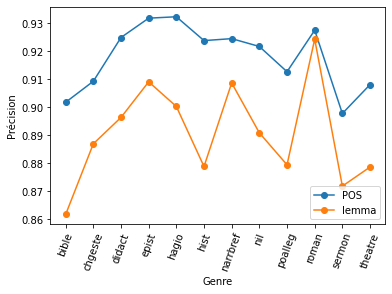

In [50]:
plt.plot(dfPlot,marker="o")
plt.gca().legend(('POS','lemma'))
plt.xticks(rotation=70)
plt.xlabel('Genre')
plt.ylabel('Précision')
plt.savefig('visualisations/courbes/tidyLex/accGenreMSTidy.png', dpi=300, transparent=False,bbox_inches='tight')

In [12]:
#sélectionner les valeurs les plus faibles pour les textes
dfLow = dfPlot.nsmallest(20, 'lemma')
#sélectionner les valeurs les plus hautes
dfHigh = dfPlot.nlargest(20,['lemma'])
dfLow

label,POS,lemma
typology,,
ElesB_T,0.5957,0.6596
PsCambrM,0.4286,0.6714
SJeanEvW,0.6613,0.6935
PerNeslesTabJ,0.7000,0.7000
BestGervM,0.7143,0.7143
NarcisusP_C,0.5952,0.7143
MarieFab_L,0.6866,0.7164
Rois,0.7087,0.7165
CharroiSch_D*,0.6512,0.7209


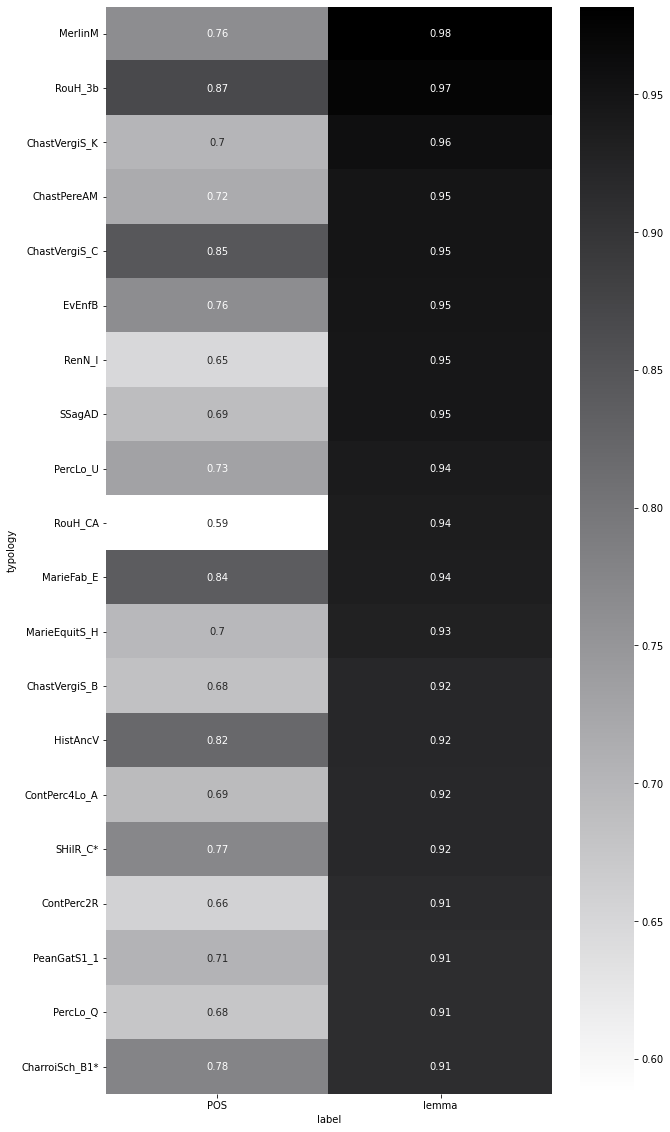

In [14]:
#on plote les valeurs les plus faibles
plt.figure(figsize=(10,20))
cmap = sns.cubehelix_palette(250, hue=0.05, rot=0, light=1, dark=0, as_cmap=True)
ax = sns.heatmap(dfHigh, annot=True, cmap=cmap)
plt.savefig('visualisationsv2/heatmaps/tidyLex/lemmaPosTextesHighLemmaTidyLex.png', dpi=300, transparent=False,bbox_inches='tight')